用いたデータはこのようになっている

In [654]:
data = read.csv("data.csv")
X = data['xn']
T = data['tn']
t(X)
t(T)

xn,0.5042519,0.6829646,0.225022,0.1155181,0.04485298,0.06125487,0.02000714,0.005314946,0.8037826,0.3788576


tn,-0.06965277,-0.9426735,0.8262086,0.4359847,0.5106443,0.2276137,0.2962799,0.05393036,-0.8261503,0.6780956


In [655]:
sigmoid = function(x) {
    return(1/(1 + exp(-x)))
}

s = 0.125
m = function(j) {
    return(0.125 * (j-1))
}
calc_mu = function(x, j) {
    return(sigmoid((x - m(j))/s))
}

calc_mus = function(X) {
    mus = c()
    for (j in 1:10) {
        for (i in 1:length(X)) {
            mus = append(mus, calc_mu(X[i],  j))  
        }
    }
    return(mus)
}

X =  append(1,X[, 1])
mus = calc_mus(X)

(1) 求めたい以下のような行列は次の出力のようになる。
$$
\boldsymbol{\Phi} = \left( \begin{array} { c } {  \boldsymbol{\phi} \left( x _ { 1 } \right) ^ { T } } \\ { \boldsymbol{\phi} \left( x _ { 2 } \right) ^ { T } } \\ { \vdots } \\ { \boldsymbol{\phi} \left( x _ { 10 } \right) ^ { T } } \end{array} \right) = \left( \begin{array} { c c c c } { \phi _ { 1 } \left( x _ { 1 } \right) } & { \phi _ { 2 } \left( x _ { 1 } \right) } & { \dots } & { \phi _ { 9 } \left( x _ { 1 } \right) } \\ { \phi _ { 1 } \left( x _ { 2 } \right) } & { \phi _ { 2 } \left( x _ { 2 } \right) } & { \dots } & { \phi _ { 9 } \left( x _ { 2 } \right) } \\ { \vdots } & { \vdots } & { \ddots } & { \vdots } \\ { \phi _ { 1 } \left( x _ { 10 } \right) } & { \phi _ { 2 } \left( x _ { 10 } \right) } & { \dots } & { \phi _ { 9 } \left( x _ { 10 } \right) } \end{array} \right)
$$

In [656]:
Mu = t(matrix(data = mus, nrow = 10,  ncol = 10))
Mu

0.999664650,0.982604848,0.9957801074,0.8581703338,0.7158858482,0.5887556833,0.6201156140,0.53992907,0.510628291,0.99839056
0.953948990,0.999088949,0.9540873932,0.9886117187,0.6900120852,0.4810452440,0.3449807098,0.37520266,0.301546809,0.27738294
0.995637166,0.883999346,0.9975273768,0.8843224865,0.9696375821,0.4502095165,0.2542911493,0.16230508,0.180944569,0.13705805
0.123739981,0.988228831,0.7370826869,0.9933071491,0.7376936503,0.9215587638,0.2315064918,0.11146579,0.066534948,0.07516282
0.055203516,0.049384154,0.9686369985,0.5077145118,0.9820137900,0.5085030641,0.8121004891,0.09976628,0.044114257,0.02555149
0.029030134,0.021042523,0.0187528167,0.9191059421,0.2750520505,0.9525741268,0.2756816068,0.61389553,0.039172339,0.01669426
0.009554182,0.010879229,0.0078454674,0.0069815351,0.8069419831,0.1224813426,0.8807970780,0.12282085,0.369052624,0.01477659
0.006206975,0.003536143,0.0040299588,0.0029005709,0.0025797481,0.6059359968,0.0488396813,0.73105858,0.048986455,0.17707624
0.005487258,0.002292413,0.0013037888,0.0014863253,0.0010690205,0.0009505864,0.3612970570,0.01853948,0.500000000,0.01859697
0.073353413,0.002025676,0.0008445553,0.0004800327,0.0005473027,0.0003935366,0.0003499115,0.17225361,0.006901168,0.26894142


(2) 求める $ w_n $ は以下のようになる。  
上から順番に、$w_0, w_1, ..., w_n$である。

In [657]:
library(MASS)
w.ml = ginv(t(Mu) %*% Mu) %*% t(Mu) * T
w.ml

tn
-0.13668880
-0.03774813
-0.49333514
-0.48815303
-0.79223537
0.55205923
0.58053070
-0.12327200
1.14431333
0.65431150


(3) 精度$\beta$は次のように、$\beta = 0.66$となる。

In [658]:
sum = 0
for (i in 1:10) {
    sum = sum + (T[i, 1] - (t(w.ml[,1]) %*% (as.vector(Mu[, i])))) ^ 2
}
beta = 10 / sum
beta

0.6605641


(4) 求める$x=0.5$の時の値は、$-1.22$

In [659]:
ans = function(x) {
    return(t(w.ml[, 1]) %*%  matrix(data=calc_mus(matrix(data=x, nrow = 1, ncol = 1)), nrow = 10, ncol = 1))
}
y = ans(0.5)
y

-1.120915


 (任意の課題) グラフを描画する

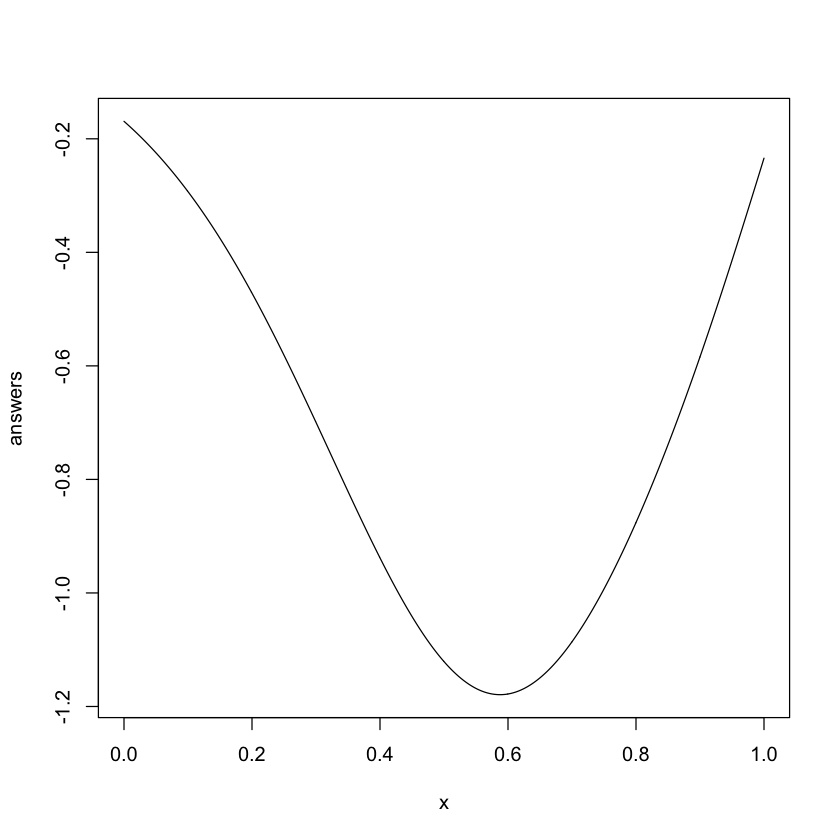

In [660]:
x = seq(from = 0, to = 1, length.out = 1000)
answers = c()
for (i in x) {
    answers = append(answers, ans(i))
}
plot(x, answers, type='l')